### Agenda
- Describe how Decision Trees solve regression and classification problems
- Implement simple decision trees
- Identify and use key parameters while developing a decision tree model
- Understand cross validation technique

### Decision Trees
- Decision trees can be used both for regression and classification problems

- They work with stratifying or segmenting the predictor space into a number of binary decisions to make the prediction. Each binary split consists of a decision rule which either sends us left or sends us right. This is the basic structure of a decision tree: [link to the image - Decision Tree](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.07/7.07-decision_tree_terminology.png)


- These are not as competitive as algorithms including random forests, bagging and boosting, which comprise of building hundreds or thousands of trees and then aggregating the results to yield a single prediction. We will take a look at these methods later this week. But decision trees form the basis of those aforementioned algorithms.

#### Decision Trees for Regression
- Here we will take the example of Boston housing data as it is a simpler regression problem. We used the Boston data from sklearn datasets in 7.6 as well. The objective was to predict the median value of a house.

- To simplify the case even further, we will take a look at the example where we have to predict the median price of a house based on only one feature lstat.

- A decision rule to make the prediction is shown here: [link to the image - Regression Tree Decision Split](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.07/7.07-regression_trees.png)

- After we train the model, this is the decision space we get. The set of bottom nodes in the decision tree gives us the partition of the feature space into disjoint regions.

- For each region, we calculate the average of the target variable falling in that region of the training data. That gives us the numerical prediction value.

#### Decision Trees for Classification
- Classification trees works in the same way as the regression trees except that instead of the final prediction being the mean of the target values falling in the disjointed region at the end, here the final prediction is the most occurring class in that region. [link to the image - Classification Tree with multiple features](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.07/7.07-classification_tree.png)


- In the example above, instead of having one predictor we have multiple predictors. The decision space is divided among them. The decision at the bottom node still follows the same methodology. The final prediction is the most occurring class in the bottom nodes.



In [1]:
import pandas as pd
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5929425370951141

#### Classification Tree

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.98

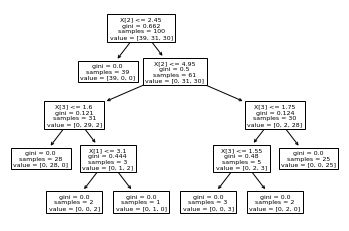

In [7]:
from sklearn import tree

tree.plot_tree(model);

In [11]:
model.feature_importances_

array([0.        , 0.02014707, 0.88704641, 0.09280652])

#### Intro to Parameters
- In the last lesson, we implemented decision trees for classification and regression. When we initialized the model, we did not pass any arguments to the function. We chose to work with default parameters. However there is a bunch of parameters that sklearn provides. These parameters can be adjusted to better suit our requirement and to the data, to improve efficiency and accuracy of the model.



- `criterion{“gini”, “entropy”}, default=”gini”` - Defines the criteria for decision split, ie., `gini` index vs. entropy.
- `min_samples_split: int or float, default=2` - This is the minimum number of training samples at a decision split point, if it is to be further split into children nodes.
- `min_samples_leaf: int or float, default=1` - This is the minimum number of training samples at a decision split point, if it is to be further split into leaf nodes.
  :exclamation: Note for instructor: `min_samples_split` and `min_samples_leaf`, they look very similar but difference is between children node and leaf node. Children node can be split further while a leaf node can't be.
- `max_depthint, default=None` - Defines the maximum depth of the tree. Each level of the decision split can be thought about as a depth level where the root node signifies level 0, next internal node as level 1 and so on and so forth.
- `max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None` - This defines the maximum number of features to pick up every time when comparing the `gini` index or the entropy criteria for choosing the feature to make the split decision.


#### Cross Validation
- When we built regression tree model and classification tree model, we observed that every time we ran the algorithm it gave us a slightly different result.

- To achieve a better estimate of the result/accuracy/performance of the model, we perform cross validation which basically repeats the process a number of times by randomly shuffling the dataset and fitting the model and checking the accuracy. [link to the image - Validation Set](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.07/7.07-validation_set.png)

##### Leave One Out Cross Validation
- This method involves splitting the training data into two parts:

  - a single observation for eg. `(x1,y1)` that is used for the validation set, and
  - the remaining observations `{(x2, y2), . . . , (xn, yn)}` that are used for training the model. Model accuracy is calculated for this data now.

- After this, another row is picked as validation set and the rest of the information for training the model. Model accuracy is calculated
- This process is repeated 'n' number of times.
- Average of all the accuracy measures is taken to get the final estimate

- One disadvantage with this method is that, since we are calculating the MSE for only observation at a time, the result is a poor estimate as it is by nature highly variable: [link to the image - LOOCV](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.07/7.07-LOOCV.png)

##### K Fold Cross Validation
- This method involves splitting the data randomly into `k` groups/folds, of approximately equal size. The first fold is treated as a validation set, and the model is fit on the remaining `k − 1` folds, which is our remaining data. The mean squared error, MSE, is then computed on the observations in the held-out/validation fold.
- After this, another fold is picked as validation set and the rest of the information for training the model. Model accuracy is calculated.
- This process is repeated `k` number of times, ie., once for each fold.
- Average of all the accuracy measures is taken to get the final estimate.
- Typically, given these considerations, one performs k-fold cross-validation using `k = 5` or `k = 10`, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance. [link to the image - K Fold Cross Validation](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/7.07/7.07-k_fold_CV.png)